In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def load_dataset(filename):
    try:
        sales_data = pd.read_csv(filename, encoding='cp1252')
        print("Dataset loaded successfull")
        return sales_data
    except Exception as e:
        print("Error loading file: ",e)
sales_data = load_dataset('Sales_Data.csv')

Dataset loaded successfull


In [3]:
sales_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
sales_data.shape

(541909, 8)

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406830 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#Missing values
sales_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135079
Country             0
dtype: int64

In [7]:
#Dropping the rows with missing values
cleaned_data = sales_data.dropna(subset=['InvoiceNo', 'CustomerID']).copy()

In [8]:
cleaned_data.shape

(406830, 8)

In [9]:
duplicate_invoices = cleaned_data.duplicated(subset=['InvoiceNo'])
duplicate_customer = cleaned_data.duplicated(subset=['CustomerID'])

In [10]:
duplicate_invoices.sum()

np.int64(384639)

In [11]:
duplicate_customer.sum()

np.int64(402457)

In [12]:
sales_cleaned = cleaned_data.drop_duplicates().copy()

In [13]:
sales_cleaned['CustomerID'] = sales_cleaned['CustomerID'].astype(int)

In [14]:
sales_cleaned.shape

(401605, 8)

In [15]:
#Total Quantity Sold
total_quantity_sold = sales_cleaned['Quantity'].sum()
total_quantity_sold

np.int64(4892907)

In [16]:
#Total Revenue Generated
sales_cleaned['Revenue'] = sales_cleaned['Quantity'] * sales_cleaned['UnitPrice']
total_revenue_generated = sales_cleaned['Revenue'].sum()
total_revenue_generated

np.float64(8278519.424)

In [17]:
#Average Unit Price
average_unit_price = total_revenue_generated/len(sales_cleaned['UnitPrice'])
average_unit_price1 = sales_cleaned['UnitPrice'].mean()
print(f"Through numpy: {average_unit_price1:,.2f}")
print("Through Manual: {:.2f}".format(average_unit_price))

Through numpy: 3.47
Through Manual: 20.61


In [18]:
#Number of Unique Customers
unique_customers = sales_cleaned['CustomerID'].nunique()
unique_customers

4373

In [19]:
sales_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


In [20]:
country_revenue = sales_cleaned.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_revenue

Country
United Kingdom          6747156.154
Netherlands              284661.540
EIRE                     250001.780
Germany                  221509.470
France                   196626.050
Australia                137009.770
Switzerland               55739.400
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  28995.760
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6988.400
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2660.770
Malta                      2505.470
United Arab Emirates

In [21]:
#France Revenue
france_revenue = country_revenue.get('France', 0)
print(f'Revenue generated from France: {france_revenue:,.2f}')

Revenue generated from France: 196,626.05


In [22]:
#Top 10 Products based on Quantity
best_products = sales_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
best_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64

In [23]:
top_10_products = best_products.reset_index()

In [24]:
top_10_products.columns = ['Product', 'ToatlQuantity']

In [25]:
top_10_products

,Product,ToatlQuantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
1,JUMBO BAG RED RETROSPOT,44963
2,ASSORTED COLOUR BIRD ORNAMENT,35215
3,WHITE HANGING HEART T-LIGHT HOLDER,34128
4,PACK OF 72 RETROSPOT CAKE CASES,33386
5,POPCORN HOLDER,30492
6,RABBIT NIGHT LIGHT,27045
7,MINI PAINT SET VINTAGE,25880
8,PACK OF 12 LONDON TISSUES,25305
9,PACK OF 60 PINK PAISLEY CAKE CASES,24129


In [26]:
#Total number of Invoices and Total Revenue Generated by each customer
customer_summary = sales_cleaned.groupby('CustomerID').agg({
    'InvoiceNo':'nunique',
    'Revenue':'sum'
}).sort_values(by='Revenue', ascending=False).reset_index()
customer_summary.columns = ['CustomerID', 'TotalInvoices', 'TotalRevenue']
customer_summary.head()

,CustomerID,TotalInvoices,TotalRevenue
0,14646,77,279489.02
1,18102,62,256438.49
2,17450,55,187322.17
3,14911,248,132458.73
4,12415,26,123725.45


In [27]:
#Revenue of Customer '12347'
customer_summary[customer_summary['CustomerID']==12347][['CustomerID', 'TotalRevenue']]

,CustomerID,TotalRevenue
318,12347,4310.0


In [28]:
#Extracting month from the InvoiceDate 
sales_cleaned['Month']=[date.split('/')[2].split()[0]+'-'+date.split('/')[0] for date in sales_cleaned['InvoiceDate']]
sales_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12


In [29]:
#Total Sales per month 
sales_per_month = sales_cleaned.groupby('Month')['Revenue'].sum().reset_index()
sales_per_month['Month'] = pd.to_datetime(sales_per_month['Month'], format='%Y-%m').dt.to_period('M').astype(str)
sales_per_month = sales_per_month.sort_values('Month')
sales_per_month

,Month,Revenue
0,2010-12,552372.860
1,2011-01,473731.900
5,2011-02,435534.070
6,2011-03,578576.210
7,2011-04,425222.671
8,2011-05,647011.670
9,2011-06,606862.520
10,2011-07,573112.321
11,2011-08,615078.090
12,2011-09,929356.232


In [30]:
#Month sales of month “2011-12”
sales_per_month[sales_per_month['Month']=='2011-12']

,Month,Revenue
4,2011-12,341539.43


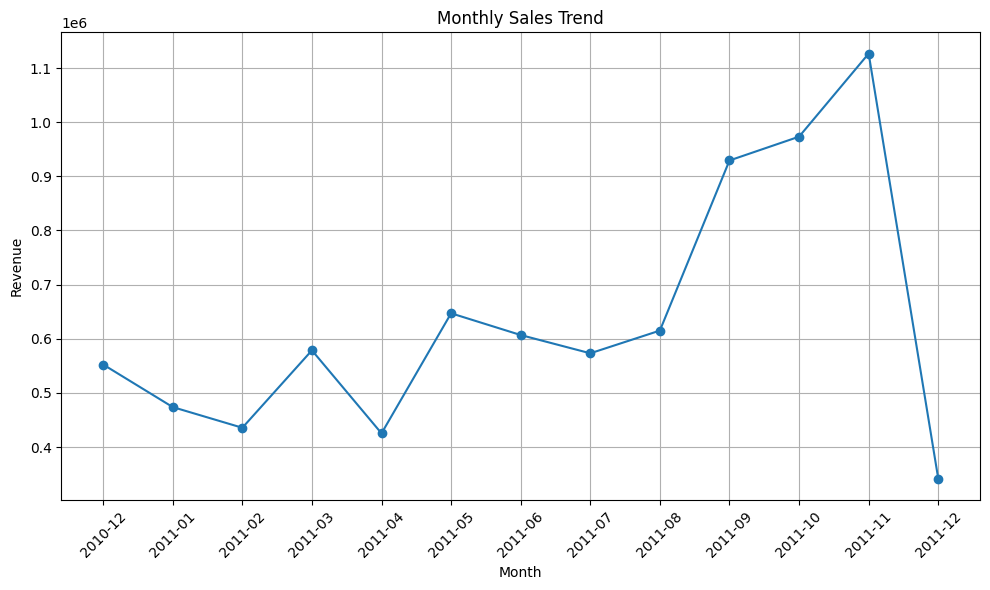

In [31]:
#Visulization of Sales per month
plt.figure(figsize=(10,6))
plt.plot(sales_per_month['Month'], sales_per_month['Revenue'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
#Average number of items (Quantity) purchased per invoice for each CustomerID '12583'
invoice_level = sales_cleaned.groupby(['CustomerID','InvoiceNo'])['Quantity'].sum().reset_index()
average_items_per_invoice = invoice_level.groupby('CustomerID')['Quantity'].mean().sort_values(ascending=False).reset_index()
average_items_per_invoice.columns = ['CustomerID', 'AvgItemsPerInvoice']
average_items_per_invoice.head()

,CustomerID,AvgItemsPerInvoice
0,13256,12540.0
1,18251,7824.0
2,13135,4300.0
3,16754,4280.0
4,12688,3028.0


In [33]:
#Total number of Countries
total_countries = sales_cleaned['Country'].nunique()
total_countries

37

In [34]:
#Top 5 countries with the highest number of unique invoices.
countries = sales_cleaned.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).reset_index()
countries.columns =['CountryName', 'UniqueInvoices']
top_5_countries = countries.head()
top_5_countries

,CountryName,UniqueInvoices
0,United Kingdom,19858
1,Germany,603
2,France,458
3,EIRE,319
4,Belgium,119


In [35]:
sales_cleaned.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,401605.000000,401605.000000,4.016050e+05,401605.000000
mean,12.183382,3.474055,1.529941e+04,20.613587
std,250.282735,69.763948,1.168924e+04,430.351684
min,-80995.000000,0.000000,1.234600e+04,-168469.600000
25%,2.000000,1.250000,1.393900e+04,4.250000
50%,5.000000,1.950000,1.514500e+04,11.700000
75%,12.000000,3.750000,1.678400e+04,19.800000
max,80995.000000,38970.000000,7.342955e+06,168469.600000


In [36]:
# Analyzing the distribution of unit prices using NumPy to get the mean, median, and standard deviation.
unit_prices = sales_cleaned['UnitPrice']
# Mean
mean_price = np.mean(unit_prices)
# Median
median_price = np.median(unit_prices)
# Standard Deviation
std_price = np.std(unit_prices)
print(f"Mean Unit Price: {mean_price:.2f}\nMedian Unit Price: {median_price:.2f}\nStandard Deviation of Unit Price: {std_price:.2f}")

Mean Unit Price: 3.47
Median Unit Price: 1.95
Standard Deviation of Unit Price: 69.76


In [37]:
#The total value of refunded products
refunds = sales_cleaned[sales_cleaned['Quantity']<0]
total_refunds = refunds['Revenue'].sum()
abs(total_refunds)

np.float64(608689.47)

In [38]:
#Total price for each product in a new column “Total Price”
sales_cleaned['TotalPrice'] = sales_cleaned['Quantity']*sales_cleaned['UnitPrice']
sales_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010-12,20.34


In [39]:
#Extracting to New File
sales_cleaned.to_csv("Sales_Data_with_TotalPrice.csv", index=False)
print("Extracted Successfully!")

Extracted Successfully!
